In [1]:
!mkdir .kaggle
import json
token = {"username":"manasgpt1305","key":"697646038f0e3d5ecc44e6ffe012ebcc"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [2]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [3]:
!kaggle datasets download -d shravankumar9892/image-colorization

100% 2.09G/2.10G [00:26<00:00, 94.0MB/s]
100% 2.10G/2.10G [00:26<00:00, 85.4MB/s]


In [4]:
!unzip /content/{/content}/datasets/shravankumar9892/image-colorization/image-colorization.zip

Archive:  /content/{/content}/datasets/shravankumar9892/image-colorization/image-colorization.zip
  inflating: ab/ab/ab1.npy           
  inflating: ab/ab/ab2.npy           
  inflating: ab/ab/ab3.npy           
  inflating: inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5  
  inflating: l/gray_scale.npy        


In [5]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [6]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [7]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image

from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import math
import numpy as np
import cv2

Using TensorFlow backend.


In [8]:
gray = np.load('/content/l/gray_scale.npy')
ab = np.load('/content/ab/ab/ab1.npy')
#ab = ab[0:2000]
#gray= gray[0:2000]
ab.shape,gray.shape

((2000, 224, 224, 2), (2000, 224, 224))

In [0]:
ab_imgs = ab
gray_imgs = gray
del(ab)
del(gray)

In [0]:
#define the function
def get_rbg_from_lab(gray_imgs, ab_imgs, n = 10):
    
    
    val = 0
    imgs = np.zeros((int(val+n), 224, 224, 3))
    
    imgs[:, :, :, 0] = gray_imgs[0:val+n:]
    imgs[:, :, :, 1:] = ab_imgs[0:val+n:]
    
    
    imgs = imgs.astype("uint8")
    
    
    imgs_ = []
    
    for i in range(0, n):
        imgs_.append(cv2.cvtColor(imgs[i], cv2.COLOR_LAB2RGB))

    
    imgs_ = np.array(imgs_)

    
    
    return imgs_

    

In [0]:
rgb_imgs = get_rbg_from_lab(gray_imgs,ab_imgs,ab_imgs.shape[0])
del(ab_imgs)

In [0]:
rgb_imgs = (rgb_imgs.astype('float32') / 255.0)

In [0]:
gray_imgs = (gray_imgs.astype('float32') / 255.0)

In [14]:
print(rgb_imgs.max())
print(rgb_imgs.min())
print(gray_imgs.max())
print(gray_imgs.min())


1.0
0.0
1.0
0.0


In [15]:
print(rgb_imgs.shape)
print(gray_imgs.shape)

(2000, 224, 224, 3)
(2000, 224, 224)


In [16]:
generator = Sequential()

generator.add(Conv2D(16,(1,1),strides=(1,1),padding='valid',input_shape=(224,224,1)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
generator.add(Conv2D(32,(1,1),strides=(1,1),padding='valid'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
generator.add(Conv2D(64,(1,1),strides=(1,1),padding='valid'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
generator.add(Conv2D(128,(1,1),strides=(1,1),padding='valid'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
generator.add(Conv2D(256,(1,1),strides=(1,1),padding='valid'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
generator.add(Conv2D(512,(1,1),strides=(1,1),padding='valid'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
generator.add(Conv2D(256,(1,1),strides=(1,1),padding='valid'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
generator.add(Conv2D(128,(1,1),strides=(1,1),padding='valid'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
generator.add(Conv2D(32,(1,1),strides=(1,1),padding='valid'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
generator.add(Conv2D(3,(1,1),strides=(1,1),padding='valid',activation='sigmoid'))

generator.compile(loss='binary_crossentropy',optimizer=Adam())
generator.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      32        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 224, 224, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 16)      64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 32)      544       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 224, 224, 32)      0         
_________________________________________________________________
batch_norma

In [17]:
discriminator = Sequential()
discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=(224,224,3)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Conv2D(32,(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Flatten())
discriminator.add(Dense(64,activation='relu'))
#discriminator.add(Dense(128,activation='relu'))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=Adam())
discriminator.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 112, 112, 64)      4864      
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 64)        102464    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        51232     
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

In [0]:
NUM_EPOCHS = 100
BATCH_SIZE = 8
NO_OF_BATCHES = math.ceil(rgb_imgs.shape[0]/float(BATCH_SIZE))
HALF_BATCH_SIZE = int(BATCH_SIZE/2)

NOISE_DIM = (224,224,1)


In [0]:

discriminator.trainable = False
gan_input = Input(shape=(224,224,1,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

In [0]:
adam = Adam()

In [0]:
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)


In [0]:
def print_imgs():
  y=gray_imgs[541]
  y=y.reshape((1,224,224,1))
  y_ = generator.predict(y)
  y_ = y_.reshape((224,224,3))
  plt.imshow(y_,interpolation='nearest')
  plt.axis('off')
  plt.show()


Epoch 1 D loss: 172.041159 G loss: 198.108293
Epoch 2 D loss: 172.039609 G loss: 198.475365
Epoch 3 D loss: 172.038734 G loss: 198.754033
Epoch 4 D loss: 172.038243 G loss: 198.965533
Epoch 5 D loss: 172.037969 G loss: 199.126033
Epoch 6 D loss: 172.037817 G loss: 199.247820
Epoch 7 D loss: 172.037735 G loss: 199.340223
Epoch 8 D loss: 172.037691 G loss: 199.410321
Epoch 9 D loss: 172.037669 G loss: 199.463496
Epoch 10 D loss: 172.037658 G loss: 199.503836


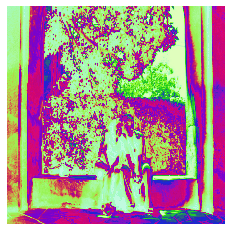

Epoch 11 D loss: 172.037654 G loss: 199.534434
Epoch 12 D loss: 172.037653 G loss: 199.557643
Epoch 13 D loss: 172.037653 G loss: 199.575244
Epoch 14 D loss: 172.037654 G loss: 199.588594
Epoch 15 D loss: 172.037655 G loss: 199.598723
Epoch 16 D loss: 172.037655 G loss: 199.606397
Epoch 17 D loss: 172.037657 G loss: 199.612234
Epoch 18 D loss: 172.037657 G loss: 199.616646
Epoch 19 D loss: 172.037658 G loss: 199.619982
Epoch 20 D loss: 172.037658 G loss: 199.622483


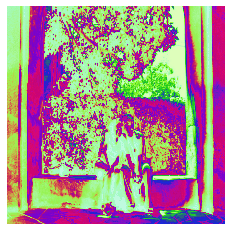

Epoch 21 D loss: 172.037659 G loss: 199.624489
Epoch 22 D loss: 172.037659 G loss: 199.625838
Epoch 23 D loss: 172.037659 G loss: 199.626862
Epoch 24 D loss: 172.037659 G loss: 199.627887
Epoch 25 D loss: 172.037660 G loss: 199.628655
Epoch 26 D loss: 172.037654 G loss: 199.628974
Epoch 27 D loss: 172.037654 G loss: 199.628979
Epoch 28 D loss: 172.037654 G loss: 199.628979
Epoch 29 D loss: 172.037654 G loss: 199.628979
Epoch 30 D loss: 172.037654 G loss: 199.628979


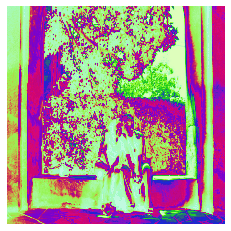

Epoch 31 D loss: 172.037654 G loss: 199.628979
Epoch 32 D loss: 172.037654 G loss: 199.628979
Epoch 33 D loss: 172.037654 G loss: 199.628979
Epoch 34 D loss: 172.037654 G loss: 199.628979
Epoch 35 D loss: 172.037654 G loss: 199.628979
Epoch 36 D loss: 172.037654 G loss: 199.628979
Epoch 37 D loss: 172.037654 G loss: 199.628979


In [0]:
for epoch in range(NUM_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    for step in range(NO_OF_BATCHES):
        #randomly select 50% real images
        idx = np.random.randint(0,rgb_imgs.shape[0],HALF_BATCH_SIZE)
        real_imgs = rgb_imgs[idx]
        
        # generate 50% random images
        #noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
        noise = gray_imgs[idx]
        noise = noise.reshape((-1,224,224,1))
        fake_imgs = generator.predict(noise)
        
        
        # one sided label smoothing
        real_y = np.ones((HALF_BATCH_SIZE,1))*0.9 #Label Smoothing, Works well in practice
        fake_y = np.zeros((HALF_BATCH_SIZE,1))
        
        # train on real and fake images
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y) #updates the weights of discriminator
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y) 
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        
        #Train Generator (Complete Model Generator + Frozen Discriminator)
        idx = np.random.randint(0,rgb_imgs.shape[0],BATCH_SIZE)
        noise = gray_imgs[idx]
        noise = noise.reshape((-1,224,224,1))
        real_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,real_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d D loss: %f G loss: %f" % ((epoch + 1), epoch_d_loss, epoch_g_loss))

    if (epoch+1)%10==0:
        generator.save('models2/gan_generator_{0}.h5'.format(epoch+1))
        print_imgs()
        #save_imgs(epoch)


In [0]:
RGB X
BGR or any other format

In [0]:
from keras import models

In [0]:
generator.save('/content/gen_50.h5')

In [0]:
from google.colab import files
files.download('/content/models2/gan_generator_40.h5')

In [0]:
files.download('/content/gen_50.h5')

In [0]:
y=gray_imgs[541]

In [0]:
y=y.reshape((1,224,224,1))

In [0]:
y_ = generator.predict(y)

In [0]:
y_ = y_.reshape((224,224,3))

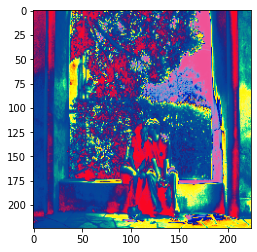

In [47]:
plt.imshow(y_)

In [44]:
y_

array([[[0.8796615 , 0.05158707, 0.26347446],
        [0.8290427 , 0.05937442, 0.29361862],
        [0.789575  , 0.06410688, 0.3111809 ],
        ...,
        [0.02319586, 0.4499306 , 0.591666  ],
        [0.02319586, 0.4499306 , 0.591666  ],
        [0.02662745, 0.5615041 , 0.5693053 ]],

       [[0.8290427 , 0.05937442, 0.29361862],
        [0.8290427 , 0.05937442, 0.29361862],
        [0.8290427 , 0.05937442, 0.29361862],
        ...,
        [0.02614725, 0.5272149 , 0.5768404 ],
        [0.02662745, 0.5615041 , 0.5693053 ],
        [0.02634424, 0.5439413 , 0.5728226 ]],

       [[0.7445439 , 0.06825799, 0.3262457 ],
        [0.8290427 , 0.05937442, 0.29361862],
        [0.7445439 , 0.06825799, 0.3262457 ],
        ...,
        [0.02023542, 0.38900813, 0.58499324],
        [0.02023542, 0.38900813, 0.58499324],
        [0.02213255, 0.43238384, 0.5907127 ]],

       ...,

       [[0.05011588, 0.20338896, 0.5692868 ],
        [0.03930044, 0.22520119, 0.58756316],
        [0.03599864, 0

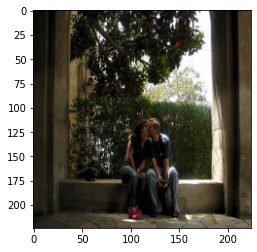

In [0]:
plt.imshow(rgb_imgs[541],cv2.cvtColor(BGR2RGB))

In [0]:
rgb_imgs[541]

array([[[  6,   6,   3],
        [  9,   7,   2],
        [  6,  10,   3],
        ...,
        [ 75,  60,  38],
        [ 75,  60,  38],
        [ 80,  65,  44]],

       [[  9,   7,   2],
        [  9,   7,   2],
        [  9,   7,   2],
        ...,
        [ 78,  64,  41],
        [ 78,  66,  41],
        [ 78,  65,  42]],

       [[ 12,  10,   5],
        [  9,   7,   2],
        [ 12,  10,   5],
        ...,
        [ 72,  56,  36],
        [ 72,  56,  38],
        [ 74,  59,  40]],

       ...,

       [[ 27,  29,  23],
        [ 29,  30,  23],
        [ 31,  31,  22],
        ...,
        [ 92,  86,  65],
        [114, 110,  86],
        [115, 111,  90]],

       [[ 31,  31,  22],
        [ 33,  31,  23],
        [ 30,  30,  21],
        ...,
        [101,  93,  74],
        [115, 109,  91],
        [119, 113,  97]],

       [[ 33,  31,  23],
        [ 33,  31,  23],
        [ 33,  31,  23],
        ...,
        [116, 112,  91],
        [115, 111,  92],
        [117, 110,  94]]

In [0]:
from PIL import Image



#Rescale to 0-255 and convert to uint8
rescaled = (255.0 / y_.max() * (y_ - y_.min())).astype(np.uint8)

im = Image.fromarray(rescaled)
im.save('test.jpg')

In [0]:
cv2.imread('/content/test.jpg')


In [0]:
cv2.imshow(y_,cvt)

array([[[ 1.7610173 ,  1.2479669 , -1.4196506 ],
        [ 1.7608252 ,  1.2479548 , -1.4196497 ],
        [ 1.760539  ,  1.2479299 , -1.4196482 ],
        ...,
        [-0.17286561,  0.6810906 ,  0.93900084],
        [-0.17286561,  0.6810906 ,  0.93900084],
        [-0.22846943, -0.45127812,  0.87425274]],

       [[ 1.7608252 ,  1.2479548 , -1.4196497 ],
        [ 1.7608252 ,  1.2479548 , -1.4196497 ],
        [ 1.7608252 ,  1.2479548 , -1.4196497 ],
        ...,
        [-0.21203828, -0.3373107 ,  0.8913887 ],
        [-0.22846943, -0.45127812,  0.87425274],
        [-0.22035481, -0.39728197,  0.88472486]],

       [[ 1.7602116 ,  1.2478995 , -1.4196466 ],
        [ 1.7608252 ,  1.2479548 , -1.4196497 ],
        [ 1.7602116 ,  1.2478995 , -1.4196466 ],
        ...,
        [-0.16588452,  1.1556404 ,  0.9810019 ],
        [-0.16588452,  1.1556404 ,  0.9810019 ],
        [-0.16603148,  0.8866248 ,  0.9561504 ]],

       ...,

       [[ 1.7103039 ,  1.2447792 , -1.4191468 ],
        [ 1

In [0]:
gray_imgs[541]

array([[0.01568628, 0.01960784, 0.02352941, ..., 0.2627451 , 0.2627451 ,
        0.28627452],
       [0.01960784, 0.01960784, 0.01960784, ..., 0.2784314 , 0.28627452,
        0.28235295],
       [0.02745098, 0.01960784, 0.02745098, ..., 0.24705882, 0.24705882,
        0.25882354],
       ...,
       [0.10196079, 0.10980392, 0.11372549, ..., 0.3647059 , 0.4627451 ,
        0.46666667],
       [0.11372549, 0.11764706, 0.10980392, ..., 0.39607844, 0.4627451 ,
        0.47843137],
       [0.11764706, 0.11764706, 0.11764706, ..., 0.47058824, 0.46666667,
        0.46666667]], dtype=float32)